In [1]:
## Libraries needs to run the script##
import sympy as sp
from scipy import interpolate
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib as mpl
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage #for dendrogram specifically
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
sns.set(style='white')
from pylab import *
import pylab
from scipy.optimize import curve_fit

In [2]:
## read the input file using pandas ##
df = pd.read_csv('../../TLCL2/H3O+/analysis.trr-PTENS-TOT.xvg', delim_whitespace=True, header=None, names= ["z", "pL"])
#df3 = pd.read_csv('OPLS-AA/tensor.dat', delim_whitespace=True, header=None, names= ["z", "pL"])
df1 = pd.read_csv('../../TLCL2/H3O+/density_H3O.dat', delim_whitespace=True, header=None, names= ["z1", "dis"])
df2 = pd.read_csv('../../TLCL2/H3O+/density_POT.dat', delim_whitespace=True, header=None, names= ["z2", "dis2"])

In [3]:
# select first column and make list
z2=df2 ['z2'].tolist()
# select second column and make list
DIS2 = df2 ['dis2'].tolist()
# select first column and make list
z1=df1 ['z1'].tolist()
# select second column and make list
DIS = df1 ['dis'].tolist()
# select first column and make list
z = df ['z'].tolist()
# select second column and make list
pL = df ['pL'].tolist()
def Average(pL): 
    return sum(pL) / len(pL)
pN = Average(pL)
print("Average of the list =", round(pN, 2))
# define function v using lambda
# define function v using lambda
#v = lambda pL : pL
from scipy import integrate
#pN = (np.trapz(v(pL), z))
df['pN-pL'] = pN - df['pL']
df['multi'] = df['pN-pL'] * df['z']
# Write data array to file in table format
np.savetxt('table2.dat', df['pN-pL'],  fmt=['%.4f'], header='diff', comments='#')

Average of the list = -4.98


In [6]:
df3 = pd.read_csv('../../TLCL2/OPLS-AA/analysis_TLCL2.trr-PTENS-TOT.xvg', delim_whitespace=True, header=None, names= ["z", "pL"])
# select first column and make list
zk = df3 ['z'].tolist()
# select second column and make list
pL3 = df3 ['pL'].tolist()
def Average(pL3): 
    return sum(pL3) / len(pL3)
pN3 = Average(pL3)
print("Average of the list =", round(pN3, 2))
# define function v using lambda
# define function v using lambda
#v = lambda pL : pL
from scipy import integrate
#pN = (np.trapz(v(pL), z))
df3['pN-pL'] = pN3 - df3['pL']
df3['multi'] = df3['pN-pL'] * df3['z']
# Write data array to file in table format
np.savetxt('table3.dat', df3['pN-pL'],  fmt=['%.4f'], header='diff', comments='#')

Average of the list = -1.19


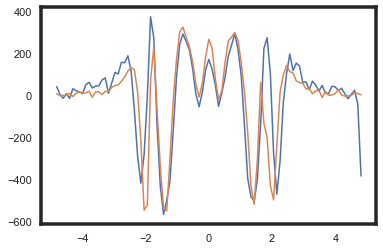

In [7]:
plt.plot(zk, df3['pN-pL'])
plt.plot(zk, df['pN-pL'])

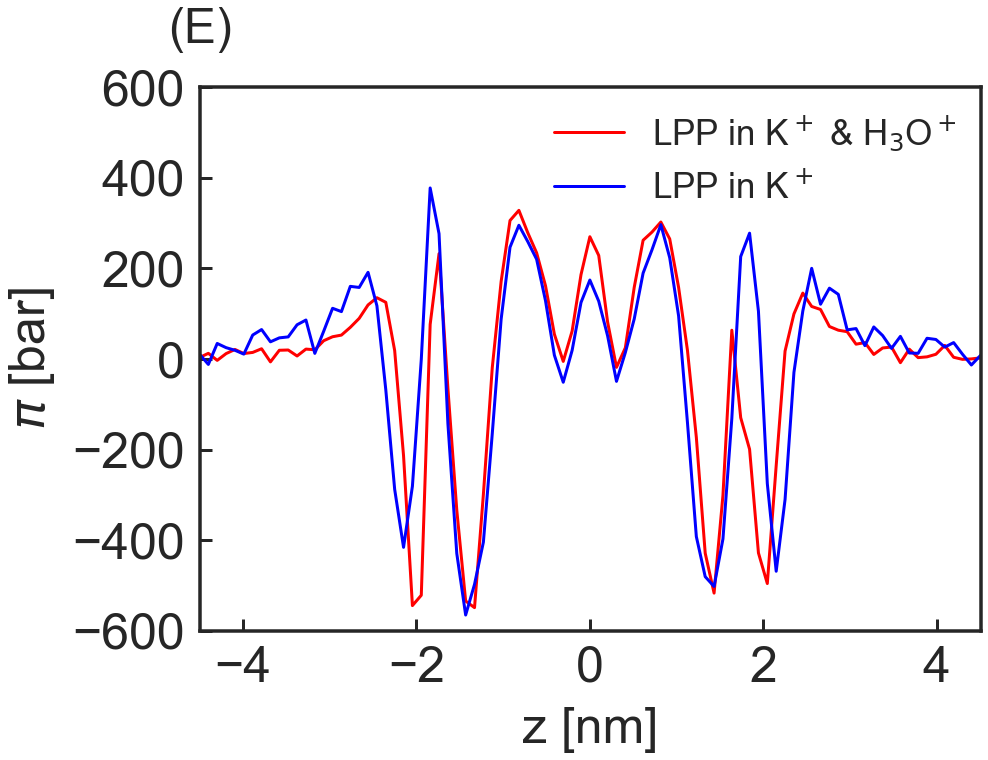

In [8]:
fig = plt.figure(1034, figsize=(14,10))
ax1 = fig.add_subplot(111)
#import matplotlib.font_manager as font_manager

from pylab import*
rc('axes', linewidth=3.5)
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)

#color = 'tab:red'
ax1.set_xlabel('z [nm]', fontsize=50, fontname='arial', labelpad=15)
#ax1.set_xlabel('z [nm]', weight='bold',fontsize=30)
ax1.set_ylabel('$\pi$ [bar]', fontsize=50, fontname='arial', labelpad=15)
ax1.plot(zk, df['pN-pL'], color='red', linewidth=3, label='LPP in K$^+$ & H$_3$O$^+$')
ax1.plot(zk, df3['pN-pL'], color='blue', linewidth=3, label='LPP in K$^+$')

#ax1.tick_params(axis ='both', which= 'major', labelsize=25, width=3.0, length=15, direction='in')
# set X limit, Y1 and Y2 limit
ax1.set_ylim([-600, 600.0])
ax1.set_yticks(np.arange(-600, 600.1, 200))
ax1.yaxis.set_minor_locator(plt.MultipleLocator(200))
ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax1.tick_params(axis ='both', which= 'major', labelsize=50, width=3.0, length=12, direction='in', top=0, bottom=1, right=0, left=1, pad=15)

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
#ax2.plot(z1, DIS, color="red", linestyle='--', linewidth=3, label='H$_3$O$^+$')
#ax2.plot(z2, DIS2, color="blue", linestyle='--', linewidth=3, label='K$^+$')
#ax2.set_ylabel('Density [kg m$^{-3}$]', fontsize=45, fontname='serif')  # we already handled the x-label with ax1
#ax2.set_ylim([0, 150.01])
#ax2.set_yticks(np.arange(25, 150.01, 25))
#ax2.yaxis.set_minor_locator(plt.MultipleLocator(25))
#ax1.tick_params(axis='both', which= 'major', bottom = 'bool', labelsize=25 )
#ax1.tick_params(axis='both', which= 'minor', bottom = 'bool', labelsize=25 )
ax1.set_xlim([-4.5, 4.51])
ax1.set_xticks(np.arange(-4, 4.01, 2))
#ax1.vlines(0, ymin=-550, ymax=150, linestyle='--', color='goldenrod', linewidth=2)
#############
#ax2.plot(E, D, color="red", label='DIS', linestyle='--', linewidth=3)
#ax2.tick_params(axis ='both', which= 'major', labelsize=40, width=3.0, length=12, direction='in', top=0, bottom=1, right=1, left=0)
ax1.legend(fontsize=35, bbox_to_anchor=(1.01,1.01), edgecolor='white', loc='upper right')
#ax1.legend(fontsize=27, bbox_to_anchor=(1.05,1.05),loc='upper right', edgecolor='white')
plt.title("(E)", loc = 'left', y=1.07, x=-0.04, fontsize=48, fontname='arial')
# Saving the plot as a 'png'
plt.savefig('Figure8E.png',bbox_inches='tight', dpi=600)
# Displaying the bar plot
plt.show()